# PyEmittance Tutorial

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pyemittance import PyEmittance
import numpy as np

In [3]:
meas = PyEmittance()

In [4]:
meas.config_name

'LCLS_OTR2'

## Three options for setting configurations for measurements:
1. Make directory under `configs/` with Machine_Device_Name with all needed jsons (see `configs/LCLS2_OTR3`), and pass dir name to `meas.config_name`
2. Change params and configs through class attributes
3. pass the dictionary to pyemittance (same keys and subkeys as `meas.config_dict` below)

In [5]:
meas.num_points = 5

In [6]:
# see all configs with command below
meas.config_dict.keys()

dict_keys(['beamline_info', 'img_proc', 'meas_pv_info', 'opt_pv_info', 'save_scalar_pvs', 'savepaths'])

In [7]:
meas.config_dict['img_proc']

{'subtract_bg': False,
 'use_roi': False,
 'avg_ims': True,
 'n_to_acquire': 5,
 'background_im': None,
 'amp_threshold': 1500,
 'min_sigma': 1.0,
 'max_sigma': 60,
 'max_samples': 3,
 'roi': {'xmin': 0, 'xmax': 100, 'ymin': 0, 'ymax': 100}}

In [8]:
meas.quad_init

[-6, -4, -2, 0]

## Example running offline with random beam size numbers

Running offline.


CAC: Unable to connect because "Connection refused"


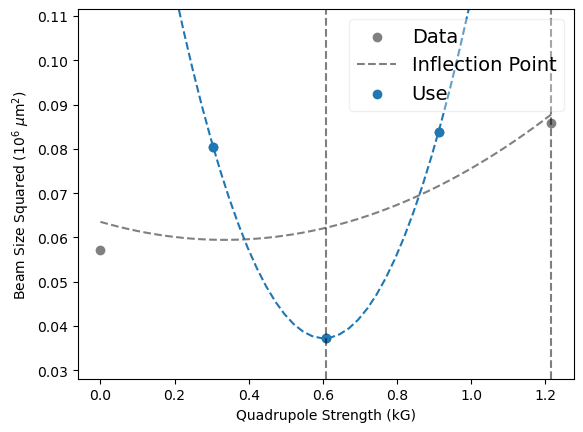

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


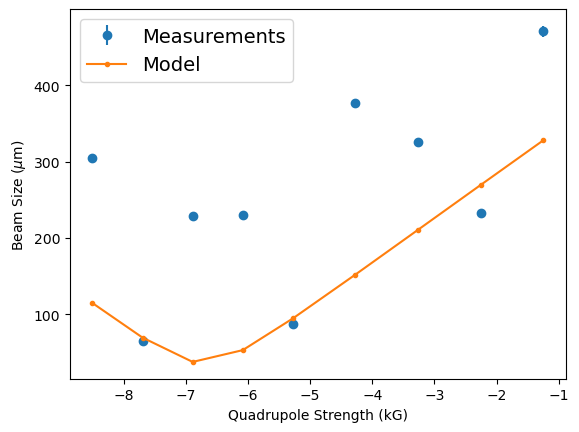

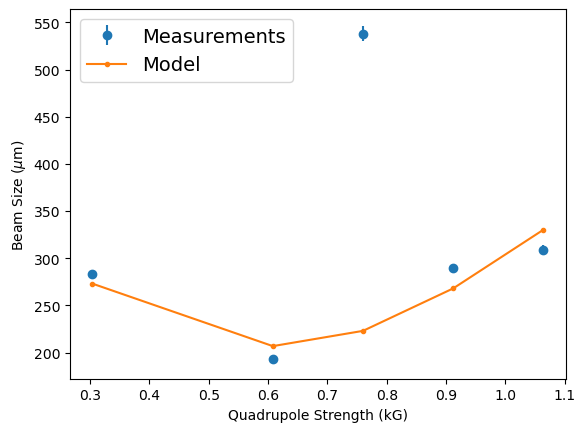

In [9]:
import matplotlib.pyplot as plt
res = meas.measure_emittance()

The output is a large dict:

In [10]:
res

{'norm_emit_x': 4.6761079065835916e-07,
 'norm_emit_y': 2.6488122012888994e-05,
 'norm_emit_x_err': 2.9496319783190612e-08,
 'norm_emit_y_err': 5.215068253811284e-07,
 'nemit': 3.519393651966502e-06,
 'nemit_err': 2.325614463058897e-07,
 'bmagx': None,
 'bmagy': None,
 'bmagx_err': None,
 'bmagy_err': None,
 'bmag_emit': None,
 'bmag_emit_err': None,
 'opt_q_x': None,
 'opt_q_y': None,
 'total_points_measured': None,
 'quadvalsx': [-8.500786387000533,
  -7.694946786928037,
  -6.889107186855541,
  -6.0832675867830455,
  -5.27742798671055,
  -4.27012848661993,
  -3.2628289865293105,
  -2.255529486438691,
  -1.2482299863480708],
 'beamsizesx': [0.0003050352315252298,
  6.584100254011753e-05,
  0.0002293874463089534,
  0.00023054962480369324,
  8.692295388072574e-05,
  0.0003761392154735279,
  0.00032589172185363646,
  0.00023207135833727398,
  0.00047041278157115585],
 'beamsizeserrx': [4.575528472878447e-06,
  9.876150381017627e-07,
  3.4408116946343006e-06,
  3.4582443720553987e-06,
  1

## Example running online (do not run on machine!)

In [11]:
meas.online = True

In [12]:
try:
    res = meas.measure_emittance()
except:
    pass # epics can't connect on my local pc

Running online!
cannot connect to OTRS:IN20:541:RESOLUTION


## Example running with some random beamsize model 
### (can be any simulation, just need to pass pyemittance the beamsize fn)

In [13]:
def get_bs_model(*args):
    return np.random.normal(1e-6, 5e-5), np.random.normal(1e-6, 5e-6), 0, 0

In [14]:
meas.use_model=True
meas.online = False # meaningless when running with a model
meas.get_bs_model = get_bs_model

Running offline.


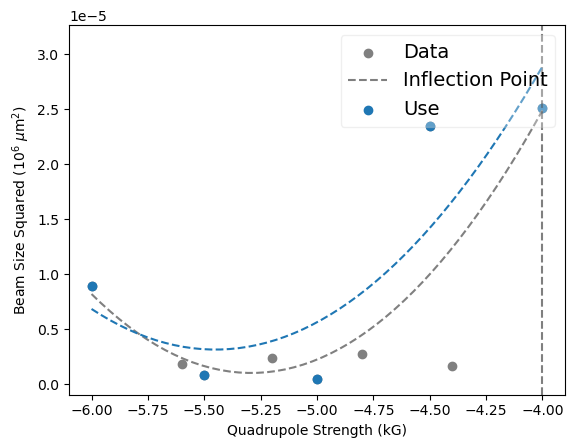

In [15]:
res = meas.measure_emittance()

In [16]:
res

{'norm_emit_x': None,
 'norm_emit_y': None,
 'norm_emit_x_err': None,
 'norm_emit_y_err': None,
 'nemit': None,
 'nemit_err': None,
 'bmagx': None,
 'bmagy': None,
 'bmagx_err': None,
 'bmagy_err': None,
 'bmag_emit': None,
 'bmag_emit_err': None,
 'opt_q_x': None,
 'opt_q_y': None,
 'total_points_measured': None,
 'quadvalsx': [-3.5999999999999996,
  -3.1999999999999997,
  -2.8,
  -2.4,
  -1.9999999999999998,
  -1.5,
  -0.9999999999999999,
  -0.49999999999999994,
  0.0],
 'beamsizesx': [-3.5476342066653456e-05,
  5.6628689018590285e-05,
  3.521540673754043e-05,
  -1.141195513819361e-05,
  -0.00012217665423217887,
  -0.00011653140075716637,
  0.00013715752909598325,
  5.916368617931216e-05,
  5.31085286568e-06],
 'beamsizeserrx': [-5.321451309998018e-07,
  8.494303352788543e-07,
  5.282311010631064e-07,
  -1.7117932707290415e-07,
  -1.832649813482683e-06,
  -1.7479710113574956e-06,
  2.057362936439749e-06,
  8.874552926896823e-07,
  7.966279298519999e-08],
 'error': True}

# Older version emittance evaluation functions

In [17]:
from pyemittance.emit_eval_example import eval_emit_surrogate, eval_emit_machine

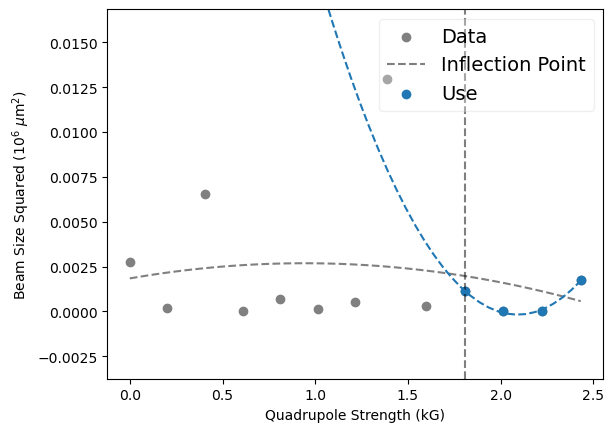

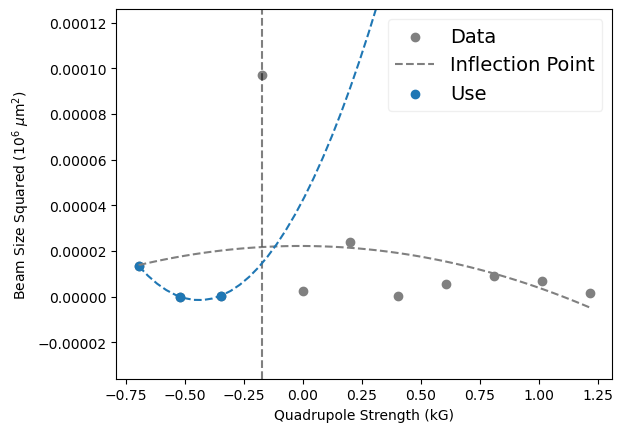

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


In [18]:
eval_emit_surrogate(
    get_bs_model, # need beamsize model for 'surrogate model'
    quad_init=[-6, -4, -2, 0],
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=True,
    show_plots=True,
    add_noise=False,
    use_prev_meas=False,
    quad_tol=0.05,
    save_runs=False,
    calc_bmag=False,
);

/Users/chrisonian/Code/mambaforge/envs/pyemittance-dev/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


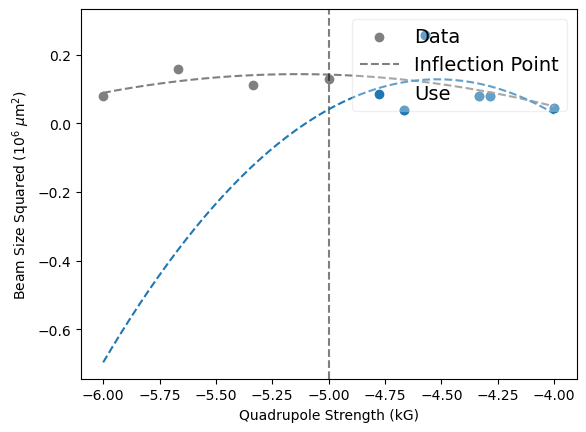

Savepaths not set. Please set them in 'configs/savepaths.json'
Using examples directory:  /Users/chrisonian/Code/GitHub/PyEmittance/examples


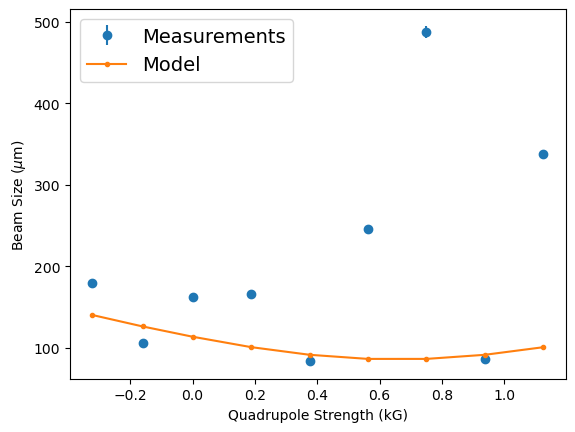

{'norm_emit_x': 1.3068594496774774e-06,
 'norm_emit_y': None,
 'norm_emit_x_err': 3.8469660336221044e-08,
 'norm_emit_y_err': None,
 'nemit': None,
 'nemit_err': None,
 'bmagx': 1.0525330099427783,
 'bmagy': None,
 'bmagx_err': 0.03098312323880869,
 'bmagy_err': None,
 'bmag_emit': None,
 'bmag_emit_err': None,
 'opt_q_x': 0.5628705468335852,
 'opt_q_y': None,
 'total_points_measured': 20,
 'quadvalsx': [-0.3216403124763344,
  -0.1608201562381672,
  0.0,
  0.18762351561119503,
  0.37524703122239006,
  0.5628705468335852,
  0.7504940624447801,
  0.9381175780559752,
  1.1257410936671703],
 'beamsizesx': [0.0001791925339110391,
  0.00010620166721680018,
  0.00016230451978764115,
  0.00016593428050558248,
  8.381786843440571e-05,
  0.00024544732474876383,
  0.00048795938749581104,
  8.62126807269916e-05,
  0.00033760473805079195],
 'beamsizeserrx': [2.6878880086655865e-06,
  1.5930250082520026e-06,
  2.434567796814617e-06,
  2.489014207583737e-06,
  1.2572680265160856e-06,
  3.681709871231

In [19]:
eval_emit_machine(
    quad_init=[-6, -4, -2, 0],
    online=False,
    config_name='FACET_nominal',
    meas_type='OTRS',
    adapt_ranges=True,
    num_points=7,
    check_sym=True,
    infl_check=True,
    add_pnts=True,
    show_plots=True,
    use_prev_meas=True,
    quad_tol=0.05,
    save_runs=False,
    calc_bmag=True,
)